In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, fci
import openfermion
import scipy

import sys
util_dir = "/home/jwdesroches/python/Ga2QuAMES/symmetry/helper_funcs/"
sys.path.append(util_dir)
from utils import *

plt.rcParams.update({'font.size': 16})

In [2]:
def get_ising_hamiltonian(mol_name, basis_set, geom, charge, spin, r_value, sym_case, bond_length):
    
    if sym_case == "no":
        qubit_hamiltonian = get_unsimplified_hamiltonian(atom = geom, basis = basis_set, charge = charge, spin = spin)
    elif sym_case == "yes":
        qubit_hamiltonian = get_simplified_hamiltonian(atom = geom, basis = basis_set, charge = charge, spin = spin)
        
    N = openfermion.utils.count_qubits(qubit_hamiltonian)
    
    ising_energies = []
    ising_ground_states = []

    if r_value == 1:
        true_ising_hamiltonian = XBK_transform(qubit_hamiltonian, 1, 1)
        
        true_ising_hamiltonian = openfermion.linalg.get_sparse_operator(true_ising_hamiltonian)
        gs_energy, ground_state = openfermion.linalg.get_ground_state(true_ising_hamiltonian)
        sumBsq = 1
        
        return true_ising_hamiltonian, gs_energy, sumBsq
        
    else:
        ising_energies = []
        ising_ground_states = []
        
        sumBsqs = []
        ising_Hs, ising_Cs = [],[]
        for p in range(int(math.ceil(r_value/2+1))):
            ising_H = XBK_transform(qubit_hamiltonian, r_value, p)
            ising_C = construct_C(N, r_value, p)
            ising_Hs += [ising_H]
            ising_Cs += [ising_C]
        
            ising_C_matrix = openfermion.linalg.get_sparse_operator(ising_C)
        
            if r_value*N == 1:
                
                ising_energy, ising_gs = np.linalg.eigh(openfermion.linalg.get_sparse_operator(ising_H).toarray())
                ising_energy = ising_energy[0]
                
            else:
                
                sparse_operator = openfermion.linalg.get_sparse_operator(ising_H)
                ising_energy, ising_gs = openfermion.linalg.get_ground_state(sparse_operator)
            
                sumBsq = round(np.linalg.norm(ising_C_matrix @ ising_gs))
                sumBsqs += [sumBsq]
                
                if sumBsq == 0:
                    pass
                ising_energy = ising_energy/sumBsq
                ising_energies.append(ising_energy)
                ising_ground_states.append(ising_gs)
                
        ising_energies = np.array(ising_energies)
        index = int(np.argmin(ising_energies))

        true_ising_hamiltonian = ising_Hs[index]
        sumBsq = sumBsqs[index]

        return true_ising_hamiltonian, ising_energies[index], sumBsq
  

In [3]:
mol_name = "H2"
basis_sets = ["3-21g", "6-31g", "cc-pvdz"] # we already have sto-3g and sto-6g
bond_lengths = np.around(np.arange(0.3,5.0,0.1),2)


all_energies_r1 = []
labels = []
for basis_set in basis_sets:
    labels.append(basis_set)   
    energies = []
    for bond_length in bond_lengths:
        geom = return_geometry(mol_name, bond_length)
        hamiltonian, energy, sumBsq = get_ising_hamiltonian(mol_name, basis_set, geom, charge=0, spin=0, r_value=1, sym_case="yes", bond_length=bond_length)
        print(energy)
        energies.append(energy)
    all_energies_r1.append(energies)   
    labels.append(basis_set)   

-0.6316837011783476
-0.9228721795168048
-1.050801396272533
-1.1047213271685739
-1.121994953219155
-1.1202128152057336
-1.1083634878527846
-1.0913860713112913
-1.0720456479041913
-1.0518385039433462
-1.0315481289240835
-1.0115931953825459
-0.99221702654024
-0.9735745737292181
-0.9557668762604237
-0.9388546409454769
-0.9228661617119422
-0.9078047739373926
-0.8936563731644813
-0.8803961214167365
-0.8679935964234183
-0.8564162013208876
-0.8456310884060769
-0.8356060137600894
-0.8263095070865727
-0.8177106419234517
-0.8097786075226846
-0.8024822332321602
-0.7957895826120038
-0.7896676995690429
-0.7840825475478003
-0.778999141530529
-0.774381840238076
-0.7701947477660367
-0.7664021698338541
-0.7629690760358183
-0.7598615309749904
-0.7570470697334648
-0.7544950155849736
-0.7521766550300533
-0.7500655105098267
-0.7481373159817154
-0.7463701013946354
-0.7447441544884297
-0.7432419484630819
-0.7418480330516171
-0.7405488978686616
-0.6451547334674465
-0.9330042006107697
-1.0580248129692695
-1.110

In [4]:
basis_sets = ["3-21g", "6-31g"] # we already have sto-3g and sto-6g

all_energies_r2 = []
for basis_set in basis_sets:
    labels.append(basis_set)   
    energies = []
    for bond_length in bond_lengths:
        geom = return_geometry(mol_name, bond_length)
        hamiltonian, energy, sumBsq = get_ising_hamiltonian(mol_name, basis_set, geom, charge=0, spin=0, r_value=2, sym_case="yes", bond_length=bond_length)
        print(energy)
        energies.append(energy)
    all_energies_r2.append(energies)

-0.631683701178348
-0.9228721795168127
-1.0508013962725555
-1.1047213271685865
-1.1219949532191587
-1.1202128152057211
-1.1083634878527873
-1.091386071311302
-1.072045647904205
-1.0518385039433493
-1.0315481289240824
-1.011593195382532
-0.992217026540249
-0.973574573729224
-0.9557668762604343
-0.9528673583116268
-0.9588555835727964
-0.9635938095819219
-0.9673389816330253
-0.9702958885863343
-0.972627271658543
-0.9744621754067069
-0.9759027827020799
-0.9770299832268315
-0.9779079023183888
-0.9785875589875526
-0.979109770079743
-0.9795073965259373
-0.9798070325412578
-0.9800302504685098
-0.9801945168541255
-0.9803138838566701
-0.9803995376106477
-0.9804602588095368
-0.980502826970386
-0.9805323822868454
-0.9805527484910993
-0.9805667156161418
-0.9805762924435909
-0.9805828581206586
-0.9805873996795247
-0.9805905709179532
-0.9805928174873255
-0.9805944354738471
-0.9805956374633086
-0.9805964980783226
-0.9805971715699684
-0.6451547334674368
-0.9330042006107832
-1.0580248129692442
-1.110030

In [5]:
"""basis_sets = ["3-21g", "6-31g"] # we already have sto-3g and sto-6g

all_energies_r3 = []
for basis_set in basis_sets:
    labels.append(basis_set)   
    energies = []
    for bond_length in bond_lengths:
        geom = return_geometry(mol_name, bond_length)
        hamiltonian, energy, sumBsq = get_ising_hamiltonian(mol_name, basis_set, geom, charge=0, spin=0, r_value=3, sym_case="yes", bond_length=bond_length)
        print(energy)
        energies.append(energy)
    all_energies_r3.append(energies)"""

'basis_sets = ["3-21g", "6-31g"] # we already have sto-3g and sto-6g\n\nall_energies_r3 = []\nfor basis_set in basis_sets:\n    labels.append(basis_set)   \n    energies = []\n    for bond_length in bond_lengths:\n        geom = return_geometry(mol_name, bond_length)\n        hamiltonian, energy, sumBsq = get_ising_hamiltonian(mol_name, basis_set, geom, charge=0, spin=0, r_value=3, sym_case="yes", bond_length=bond_length)\n        print(energy)\n        energies.append(energy)\n    all_energies_r3.append(energies)'

In [6]:
fci_bond_lengths = np.linspace(0.3, 5.0, 100)
fci_energies = []
for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(atom=return_geometry(mol_name, bond_length), basis=basis_set, unit="angstrom")
    mf = scf.RHF(mol)
    mf.kernel()

    cisolver = fci.FCI(mf)
    fci_energy = cisolver.kernel()[0]
    fci_energies.append(fci_energy)

converged SCF energy = -0.645154733467444
converged SCF energy = -0.812046686060163
converged SCF energy = -0.923526080340744
converged SCF energy = -0.998819481825341
converged SCF energy = -1.04961287452145
converged SCF energy = -1.08337572332553
converged SCF energy = -1.10506638153276
converged SCF energy = -1.11807174018729
converged SCF energy = -1.12476023655014
converged SCF energy = -1.12682249107099
converged SCF energy = -1.12548668614791
converged SCF energy = -1.12165744605521
converged SCF energy = -1.11600755005944
converged SCF energy = -1.10904039439362
converged SCF energy = -1.10113397604543
converged SCF energy = -1.09257275562861
converged SCF energy = -1.08357116109559
converged SCF energy = -1.07429105997012
converged SCF energy = -1.06485476559595
converged SCF energy = -1.05535472071628
converged SCF energy = -1.04586072822747
converged SCF energy = -1.03642538741635
converged SCF energy = -1.02708821846231
converged SCF energy = -1.01787881707669
converged SC

In [7]:
df = pd.read_csv("extracted_data.csv")
df = df.dropna()

df.head()

,Filename,Molecule,Basis Set,Geometry,Charge,Spin,R value,Symmetry Case,Bond Length,Number of Qubits [JW Hamiltonian],Number of Qubits [Ising Hamiltonian],Ising Energy [Hartree],Total Calculation Time [s]
1,input-0001.out,H2,sto-3g,H 0 0 0; H 0 0 0.3,0.0,0.0,1.0,yes,0.3,1.0,1.0,-0.593828,0.001604
2,input-0002.out,H2,sto-3g,H 0 0 0; H 0 0 0.4,0.0,0.0,1.0,yes,0.4,1.0,1.0,-0.904361,0.001886
3,input-0003.out,H2,sto-3g,H 0 0 0; H 0 0 0.5,0.0,0.0,1.0,yes,0.5,1.0,1.0,-1.042996,0.001574
4,input-0004.out,H2,sto-3g,H 0 0 0; H 0 0 0.6,0.0,0.0,1.0,yes,0.6,1.0,1.0,-1.101128,0.002512
5,input-0005.out,H2,sto-3g,H 0 0 0; H 0 0 0.7,0.0,0.0,1.0,yes,0.7,1.0,1.0,-1.117349,0.002122


/tmp/ipykernel_2329/698365778.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("hsv", len(basis_sets))


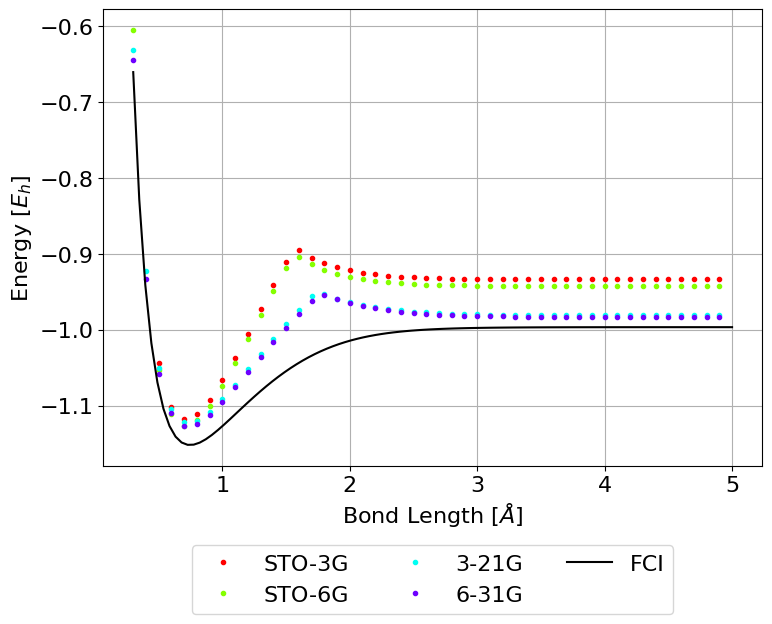

In [9]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

basis_sets = ["sto-3g", "sto-6g", "3-21g", "6-31g", "cc-pvdz"]

r = 2
access_energies = []

cmap = get_cmap("hsv", len(basis_sets))
fig, ax = plt.subplots(figsize = (8,7))

# Plotting the data
for i, basis_set in enumerate(basis_sets):
    color = cmap(i)
    if basis_set == "sto-3g" or basis_set == "sto-6g":
        if basis_set == "sto-3g":
            label_name = "STO-3G"
        else: 
            label_name = "STO-6G"
        ax.plot(df["Bond Length"][(df["Molecule"] == mol_name) & (df["Basis Set"] == basis_set) & 
                    (df["Symmetry Case"] == "yes") & (df["R value"] == r)], 
                df["Ising Energy [Hartree]"][(df["Molecule"] == mol_name) & (df["Basis Set"] == basis_set) & 
                    (df["Symmetry Case"] == "yes") & (df["R value"] == r)], 
                '.', color=color, label=label_name)
    
    elif basis_set == "3-21g":
        if r == 1:
            ax.plot(bond_lengths, all_energies_r1[0], '.', color=color, label="3-21G")
        elif r == 2:
            ax.plot(bond_lengths, all_energies_r2[0], '.', color=color, label="3-21G")
    
    elif basis_set == "6-31g":
        if r == 1:
            ax.plot(bond_lengths, all_energies_r1[1], '.', color=color, label="6-31G")
        elif r == 2:
            ax.plot(bond_lengths, all_energies_r2[1], '.', color=color, label="6-31G")
            
    elif basis_set == "cc-pvdz":
        if r == 1:
            ax.plot(bond_lengths, all_energies_r1[2], '.', color=color, label="cc-pVDZ")

ax.plot(fci_bond_lengths, fci_energies, "-k", label = "FCI")
ax.set_xlabel("Bond Length [$\AA$]")
ax.set_ylabel("Energy [$E_h$]")

# Adding the legend outside of the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax.grid()

# Adjusting the layout to accommodate the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()
